## Summer School on Deep Learning Surathkal, Karnataka - 2019

### Small Unet-Depth1(No Augmentation)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
data_dir_list=os.chdir('/content/drive/My Drive/SSDL/Day3/DATA')

In [0]:
import os
import cv2
import numpy as np
PATH = os.getcwd()
data_path = PATH + '/D1'
data_dir_list = os.listdir(data_path)

In [4]:
img_data_list=[]
for dataset in data_dir_list:
    img_list= sorted(os.listdir(data_path+'/'+ dataset))
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    var=0;
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)
        var=var+1
        if var==20:
          break
print("Loaded_Sccessfully")
data = np.array(img_data_list)
print(data.shape)

Loaded the images of dataset-Data

Loaded_Sccessfully
(20, 128, 128)


In [5]:
PATH1 = os.getcwd()
data_path1 = PATH1 + '/L1'
data_dir_list1 = os.listdir(data_path1)
print(data_dir_list1)

['label']


In [6]:
img_data_list1=[]
for dataset1 in data_dir_list1:
    img_list1=sorted(os.listdir(data_path1+'/'+ dataset1))
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset1))
    var=0;
    for img1 in img_list1:
        input_img1=cv2.imread(data_path1 + '/'+ dataset1 + '/'+ img1 )
        input_img1=cv2.cvtColor(input_img1, cv2.COLOR_BGR2GRAY)
        input_img_resize1=cv2.resize(input_img1,(128,128))
        img_data_list1.append(input_img_resize1)
        var=var+1
        if var==20:
          break
label= np.array(img_data_list1)
print(label.shape)

Loaded the images of dataset-label

(20, 128, 128)


(128, 128)


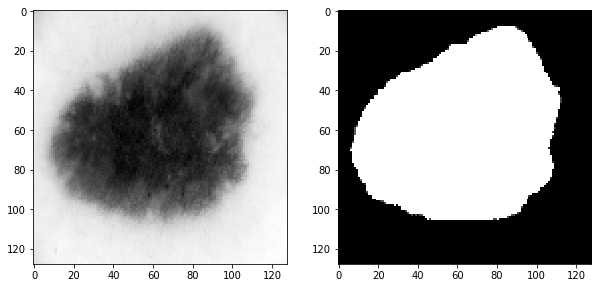

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
plt.subplot(121).imshow(data [0],'gray')
plt.subplot(122).imshow(label[0],'gray')
print(data[0].shape)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [0]:
x,y = shuffle(data,label, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [0]:
X_train = np.reshape(X_train,(-1,128,128,1))
y_train = np.reshape(y_train,(-1,128,128,1))

X_train = X_train.astype('float32')/255
y_train = y_train.astype('float32')/255

X_test = np.reshape(X_test,(-1,128,128,1))
y_test = np.reshape(y_test,(-1,128,128,1))

X_test = X_test.astype('float32')/255
y_test = y_test.astype('float32')/255

In [11]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(16, 128, 128, 1)
(16, 128, 128, 1)
(4, 128, 128, 1)
(4, 128, 128, 1)


In [12]:
mean = np.mean(X_train)
std = np.std(X_train)

print(mean)
print(std)

X_train = X_train-mean
X_train = X_train/std

X_test = X_test-mean
X_test = X_test/std

0.5904963
0.1954056


In [13]:
!pip install medpy
from keras.layers import *
import keras
from keras import Model
from keras.models import Sequential
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
#from livelossplot.keras import PlotLossesCallback
from medpy.metric import dc, precision, recall
from keras import Model

Using TensorFlow backend.


In [14]:
input_layer = Input(shape=(128,128,1))

c1 = Conv2D(8, (3,3),  padding='same')(input_layer)
ba1 = BatchNormalization()(c1)
a1 = Activation('relu')(ba1)
p1 = MaxPooling2D(pool_size=(2,2)) (a1)

c2 = Conv2D(16, (3,3),  padding='same')(p1)
bb1 = BatchNormalization()(c2)
a2 = Activation('relu')(bb1)
p2 = MaxPooling2D(pool_size=(2,2)) (a2)

ct = Conv2DTranspose(16,kernel_size=(2,2),strides=(2,2))(p2)
bc1 = BatchNormalization()(ct)
add1 = Add()([bb1,bc1])
ct2 = Conv2DTranspose(32,kernel_size=(2,2),strides=(2,2))(add1)
bd1 = BatchNormalization()(ct2)
c3 = Conv2D(1, (3,3),  padding='same')(bd1)
bd2 = BatchNormalization()(c3)

model = Model(input_layer,bd2)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 8)  80          input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 8)  32          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 128, 128, 8)  0           batch_normalization_1[0][0]      
_____________________________________

In [0]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1)

In [0]:
import math
from keras.callbacks import EarlyStopping,ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mc = ModelCheckpoint('2Small_unet_pool.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [0]:
optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)

In [0]:
model.compile(loss='mse', optimizer=optimizer, metrics=[dice_coef,'accuracy'])

In [0]:
history = model.fit(X_train, y_train,validation_split = (0.2),epochs=1000,verbose=1,callbacks=[es,mc])

Train on 576 samples, validate on 144 samples
Epoch 1/1000
576/576 [==============================] - 2s 4ms/step - loss: 1.0177 - dice_coef: 0.8190 - acc: 0.4963 - val_loss: 2.3472 - val_dice_coef: 1.4347 - val_acc: 0.3272

Epoch 00001: val_loss improved from inf to 2.34720, saving model to 2Small_unet_pool.h5
Epoch 2/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.8393 - dice_coef: 1.3113 - acc: 0.4412 - val_loss: 1.1733 - val_dice_coef: 1.1074 - val_acc: 0.5173

Epoch 00002: val_loss improved from 2.34720 to 1.17333, saving model to 2Small_unet_pool.h5
Epoch 3/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.7764 - dice_coef: 1.3433 - acc: 0.4135 - val_loss: 0.6317 - val_dice_coef: 1.3780 - val_acc: 0.4502

Epoch 00003: val_loss improved from 1.17333 to 0.63167, saving model to 2Small_unet_pool.h5
Epoch 4/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.7236 - dice_coef: 1.3366 - acc: 0.4394 - val_loss: 0.6394 - val_dic

576/576 [==============================] - 1s 1ms/step - loss: 0.1204 - dice_coef: 0.6105 - acc: 0.8411 - val_loss: 0.1281 - val_dice_coef: 0.6614 - val_acc: 0.8346

Epoch 00067: val_loss did not improve from 0.12617
Epoch 68/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1174 - dice_coef: 0.6131 - acc: 0.8451 - val_loss: 0.1229 - val_dice_coef: 0.6089 - val_acc: 0.8398

Epoch 00068: val_loss improved from 0.12617 to 0.12293, saving model to 2Small_unet_pool.h5
Epoch 69/1000
576/576 [==============================] - 1s 985us/step - loss: 0.1190 - dice_coef: 0.6053 - acc: 0.8432 - val_loss: 0.1275 - val_dice_coef: 0.5982 - val_acc: 0.8379

Epoch 00069: val_loss did not improve from 0.12293
Epoch 70/1000
576/576 [==============================] - 1s 989us/step - loss: 0.1173 - dice_coef: 0.6055 - acc: 0.8433 - val_loss: 0.1229 - val_dice_coef: 0.6185 - val_acc: 0.8397

Epoch 00070: val_loss did not improve from 0.12293
Epoch 71/1000
576/576 [======================


Epoch 00135: val_loss did not improve from 0.11798
Epoch 136/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1140 - dice_coef: 0.5636 - acc: 0.8468 - val_loss: 0.1201 - val_dice_coef: 0.5566 - val_acc: 0.8368

Epoch 00136: val_loss did not improve from 0.11798
Epoch 137/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1134 - dice_coef: 0.5656 - acc: 0.8491 - val_loss: 0.1200 - val_dice_coef: 0.5915 - val_acc: 0.8373

Epoch 00137: val_loss did not improve from 0.11798
Epoch 138/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1138 - dice_coef: 0.5651 - acc: 0.8479 - val_loss: 0.1173 - val_dice_coef: 0.5882 - val_acc: 0.8420

Epoch 00138: val_loss improved from 0.11798 to 0.11735, saving model to 2Small_unet_pool.h5
Epoch 139/1000
576/576 [==============================] - 1s 995us/step - loss: 0.1127 - dice_coef: 0.5667 - acc: 0.8497 - val_loss: 0.1184 - val_dice_coef: 0.5758 - val_acc: 0.8413

Epoch 00139: val_loss did no

576/576 [==============================] - 1s 1ms/step - loss: 0.1141 - dice_coef: 0.5663 - acc: 0.8479 - val_loss: 0.1164 - val_dice_coef: 0.5955 - val_acc: 0.8440

Epoch 00205: val_loss improved from 0.11685 to 0.11642, saving model to 2Small_unet_pool.h5
Epoch 206/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1110 - dice_coef: 0.5712 - acc: 0.8515 - val_loss: 0.1165 - val_dice_coef: 0.5980 - val_acc: 0.8427

Epoch 00206: val_loss did not improve from 0.11642
Epoch 207/1000
576/576 [==============================] - 1s 998us/step - loss: 0.1119 - dice_coef: 0.5703 - acc: 0.8496 - val_loss: 0.1181 - val_dice_coef: 0.5794 - val_acc: 0.8440

Epoch 00207: val_loss did not improve from 0.11642
Epoch 208/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1118 - dice_coef: 0.5704 - acc: 0.8512 - val_loss: 0.1222 - val_dice_coef: 0.5628 - val_acc: 0.8409

Epoch 00208: val_loss did not improve from 0.11642
Epoch 209/1000
576/576 [====================


Epoch 00274: val_loss did not improve from 0.11524
Epoch 275/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1092 - dice_coef: 0.5791 - acc: 0.8527 - val_loss: 0.1194 - val_dice_coef: 0.5566 - val_acc: 0.8447

Epoch 00275: val_loss did not improve from 0.11524
Epoch 276/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1102 - dice_coef: 0.5769 - acc: 0.8537 - val_loss: 0.1167 - val_dice_coef: 0.5889 - val_acc: 0.8458

Epoch 00276: val_loss did not improve from 0.11524
Epoch 277/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1089 - dice_coef: 0.5806 - acc: 0.8544 - val_loss: 0.1166 - val_dice_coef: 0.5678 - val_acc: 0.8460

Epoch 00277: val_loss did not improve from 0.11524
Epoch 278/1000
576/576 [==============================] - 1s 999us/step - loss: 0.1102 - dice_coef: 0.5785 - acc: 0.8525 - val_loss: 0.1158 - val_dice_coef: 0.5795 - val_acc: 0.8448

Epoch 00278: val_loss did not improve from 0.11524
Epoch 279/1000
576

576/576 [==============================] - 1s 1000us/step - loss: 0.1096 - dice_coef: 0.5792 - acc: 0.8534 - val_loss: 0.1188 - val_dice_coef: 0.5612 - val_acc: 0.8436

Epoch 00310: val_loss did not improve from 0.11522
Epoch 311/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1102 - dice_coef: 0.5786 - acc: 0.8521 - val_loss: 0.1165 - val_dice_coef: 0.5933 - val_acc: 0.8465

Epoch 00311: val_loss did not improve from 0.11522
Epoch 312/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1097 - dice_coef: 0.5754 - acc: 0.8524 - val_loss: 0.1175 - val_dice_coef: 0.6128 - val_acc: 0.8453

Epoch 00312: val_loss did not improve from 0.11522
Epoch 313/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1100 - dice_coef: 0.5775 - acc: 0.8535 - val_loss: 0.1176 - val_dice_coef: 0.5711 - val_acc: 0.8462

Epoch 00313: val_loss did not improve from 0.11522
Epoch 314/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1115

576/576 [==============================] - 1s 1ms/step - loss: 0.1091 - dice_coef: 0.5814 - acc: 0.8542 - val_loss: 0.1173 - val_dice_coef: 0.5629 - val_acc: 0.8455

Epoch 00345: val_loss did not improve from 0.11499
Epoch 346/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1084 - dice_coef: 0.5842 - acc: 0.8560 - val_loss: 0.1213 - val_dice_coef: 0.5518 - val_acc: 0.8419

Epoch 00346: val_loss did not improve from 0.11499
Epoch 347/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1097 - dice_coef: 0.5814 - acc: 0.8526 - val_loss: 0.1229 - val_dice_coef: 0.5397 - val_acc: 0.8392

Epoch 00347: val_loss did not improve from 0.11499
Epoch 348/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1090 - dice_coef: 0.5824 - acc: 0.8540 - val_loss: 0.1193 - val_dice_coef: 0.5562 - val_acc: 0.8422

Epoch 00348: val_loss did not improve from 0.11499
Epoch 349/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1084 - 

576/576 [==============================] - 1s 1ms/step - loss: 0.1079 - dice_coef: 0.5844 - acc: 0.8561 - val_loss: 0.1159 - val_dice_coef: 0.5947 - val_acc: 0.8479

Epoch 00380: val_loss did not improve from 0.11467
Epoch 381/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1077 - dice_coef: 0.5852 - acc: 0.8560 - val_loss: 0.1172 - val_dice_coef: 0.6056 - val_acc: 0.8470

Epoch 00381: val_loss did not improve from 0.11467
Epoch 382/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1096 - dice_coef: 0.5813 - acc: 0.8533 - val_loss: 0.1163 - val_dice_coef: 0.6214 - val_acc: 0.8472

Epoch 00382: val_loss did not improve from 0.11467
Epoch 383/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1080 - dice_coef: 0.5843 - acc: 0.8563 - val_loss: 0.1163 - val_dice_coef: 0.5935 - val_acc: 0.8474

Epoch 00383: val_loss did not improve from 0.11467
Epoch 384/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1081 - 

576/576 [==============================] - 1s 1ms/step - loss: 0.1083 - dice_coef: 0.5839 - acc: 0.8552 - val_loss: 0.1162 - val_dice_coef: 0.5931 - val_acc: 0.8457

Epoch 00415: val_loss did not improve from 0.11422
Epoch 416/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1084 - dice_coef: 0.5828 - acc: 0.8548 - val_loss: 0.1177 - val_dice_coef: 0.6174 - val_acc: 0.8460

Epoch 00416: val_loss did not improve from 0.11422
Epoch 417/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1084 - dice_coef: 0.5841 - acc: 0.8538 - val_loss: 0.1152 - val_dice_coef: 0.6081 - val_acc: 0.8484

Epoch 00417: val_loss did not improve from 0.11422
Epoch 418/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1078 - dice_coef: 0.5860 - acc: 0.8565 - val_loss: 0.1165 - val_dice_coef: 0.5987 - val_acc: 0.8453

Epoch 00418: val_loss did not improve from 0.11422
Epoch 419/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1098 - 

In [0]:
model.evaluate(X_test,y_test)

In [0]:
train_loss = history.history['loss']
train_acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
xc=range(446)

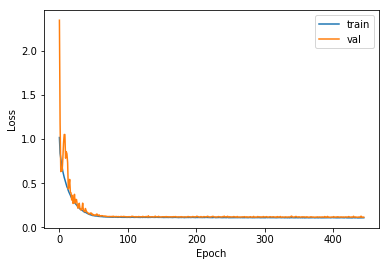

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

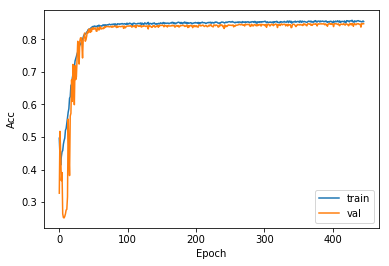

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

In [0]:
from keras.models import load_model
model.load_weights('/content/drive/My Drive/SSDL/Day3/Small_Unet_Pool_No_Aug/Weights/2Small_unet_pool.h5')

In [0]:
a = np.reshape(X_test[3],(128,128))
b = np.reshape(y_test[3],(128,128))

c = np.copy(a)
d = np.copy(b)

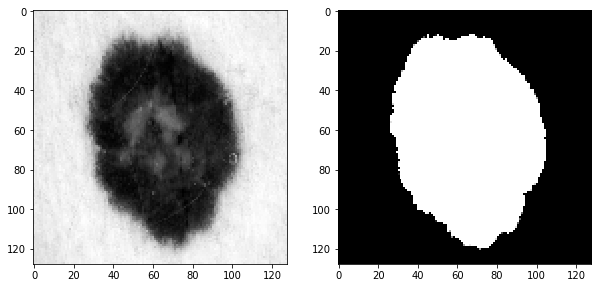

In [18]:
plt.figure(figsize=(10,10))
plt.subplot(121).imshow(a, 'gray')
plt.subplot(122).imshow(b,'gray')

In [0]:
testing_image = np.reshape(X_test[3], (1,128,128,1))

In [0]:
prediction = model.predict(testing_image)
prediction.shape
prediction = prediction.reshape((128,128))

-0.12147085
1.2219287


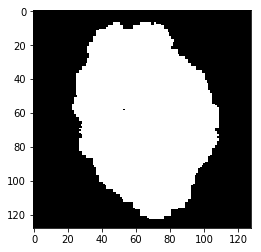

In [21]:
sample = prediction > 0.5
print(np.min(prediction))
print(np.max(prediction))
plt.imshow(sample, cmap = "gray")

Text(0.5, 0, 'PREDICTION')

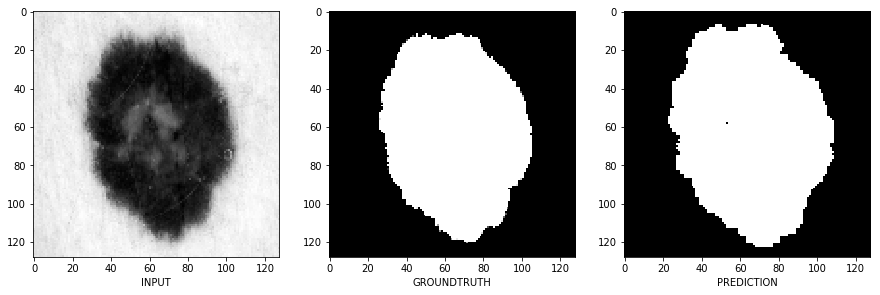

In [22]:
plt.figure(figsize=(15,15))

plt.subplot(131).imshow(c,'gray')
plt.xlabel('INPUT')

plt.subplot(132).imshow(d,'gray')
plt.xlabel('GROUNDTRUTH')

plt.subplot(133).imshow(sample,'gray')
plt.xlabel('PREDICTION')

In [23]:
train_pred = model.predict(X_train, batch_size=32)
train_result = np.zeros(train_pred.shape)
train_result[train_pred>0.5] = 1
train_result[train_pred<=0.5] = 0
dice = dc(train_result, y_train)
pre  = precision(train_result,y_train)
re   = recall(train_result,y_train)
print('Train dc: '  + str(dice))
print('Train pre: ' + str(pre))
print('Train re: '  + str(re))

Train dc: 0.7714396408304656
Train pre: 0.867089039926227
Train re: 0.6947960426387881


In [24]:
test_pred = model.predict(X_test, batch_size=32)
test_result = np.zeros(test_pred.shape)
test_result[test_pred>0.5] = 1
test_result[test_pred<=0.5] = 0
dice = dc(test_result, y_test)
pre  = precision(test_result,y_test)
re   = recall(test_result,y_test)
print('Test dc: '  + str(dice))
print('Test pre: ' + str(pre))
print('Test re: '  + str(re))

Test dc: 0.6176355066771406
Test pre: 0.8420348058902276
Test re: 0.487672507365483
